In [28]:
%matplotlib inline
%load_ext memory_profiler
from sklearn.neighbors import NearestNeighbors
from sklearn.random_projection import SparseRandomProjection
from bioinf_learn.util import neighborhood_accuracy
from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer
import time 
from sklearn.random_projection import GaussianRandomProjection

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [2]:
graphs = gspan_to_eden( 'http://www.bioinf.uni-freiburg.de/~costa/bursi.gspan' )
vectorizer = Vectorizer( r=2,d=5 )
%time %memit datasetBursi = vectorizer.transform( graphs )

peak memory: 482.80 MiB, increment: 388.90 MiB
CPU times: user 35.3 s, sys: 156 ms, total: 35.4 s
Wall time: 36.3 s


In [3]:
time_list = []
accuracy_list = []

In [4]:
print "Shape: ", datasetBursi.shape
print "Approximate number of non-zero features: ", datasetBursi.nnz / float(datasetBursi.shape[0])
print "Sparsity: ", datasetBursi.nnz / float(datasetBursi.shape[0]) / datasetBursi.shape[1]

Shape:  (4337, 1048577)
Approximate number of non-zero features:  373.168549689
Sparsity:  0.000355880922134


In [5]:
data_projection = SparseRandomProjection(n_components=10000, random_state=1)
dataset_dense_10000 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=1000, random_state=1)
dataset_dense_1000 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=800, random_state=1)
dataset_dense_800 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=600, random_state=1)
dataset_dense_600 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=400, random_state=1)
dataset_dense_400 = data_projection.fit_transform(datasetBursi)

data_projection = SparseRandomProjection(n_components=100, random_state=1)
dataset_dense_100 = data_projection.fit_transform(datasetBursi)


In [7]:
print "Projeted to 10000 dimensions:\n"
print "Shape: ", dataset_dense_10000.shape
print "Approximate number of non-zero features: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0])
print "Sparsity: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0]) / dataset_dense_10000.shape[1]
print "\n"

print "Projeted to 1000 dimensions:\n"
print "Shape: ", dataset_dense_1000.shape
print "Approximate number of non-zero features: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0])
print "Sparsity: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0]) / dataset_dense_1000.shape[1]
print "\n"

print "Projeted to 800 dimensions:\n"
print "Shape: ", dataset_dense_800.shape
print "Approximate number of non-zero features: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0])
print "Sparsity: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0]) / dataset_dense_800.shape[1]
print "\n"

print "Projeted to 600 dimensions:\n"
print "Shape: ", dataset_dense_600.shape
print "Approximate number of non-zero features: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0])
print "Sparsity: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0]) / dataset_dense_600.shape[1]
print "\n"

print "Projeted to 400 dimensions:\n"
print "Shape: ", dataset_dense_400.shape
print "Approximate number of non-zero features: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0])
print "Sparsity: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0]) / dataset_dense_400.shape[1]
print "\n"

print "Projeted to 100 dimensions:\n"
print "Shape: ", dataset_dense_100.shape
print "Approximate number of non-zero features: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0])
print "Sparsity: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0]) / dataset_dense_100.shape[1]

Projeted to 10000 dimensions:

Shape:  (4337, 10000)
Approximate number of non-zero features:  2913.90246714
Sparsity:  0.291390246714


Projeted to 1000 dimensions:

Shape:  (4337, 1000)
Approximate number of non-zero features:  286.160018446
Sparsity:  0.286160018446


Projeted to 800 dimensions:

Shape:  (4337, 800)
Approximate number of non-zero features:  229.502190454
Sparsity:  0.286877738068


Projeted to 600 dimensions:

Shape:  (4337, 600)
Approximate number of non-zero features:  175.481438783
Sparsity:  0.292469064638


Projeted to 400 dimensions:

Shape:  (4337, 400)
Approximate number of non-zero features:  119.386903389
Sparsity:  0.298467258474


Projeted to 100 dimensions:

Shape:  (4337, 100)
Approximate number of non-zero features:  29.6795019599
Sparsity:  0.296795019599


In [8]:
exact = NearestNeighbors()
exact.fit(datasetBursi)
time_start = time.time()
exactNeighbors = exact.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)

In [9]:
randomProjection = NearestNeighbors()

randomProjection.fit(dataset_dense_10000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 10000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)

accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 10000 dimensions:  0.903020521098


In [10]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_1000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 1000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 1000 dimensions:  0.753792944432


In [11]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_800)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 800 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 800 dimensions:  0.731657827992


In [12]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_600)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 600 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 600 dimensions:  0.697855660595


In [13]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_400)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 400 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 400 dimensions:  0.646253170394


In [14]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_100)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 100 dimensions: ", neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

Accuracy with projection to 100 dimensions:  0.438044731381


7


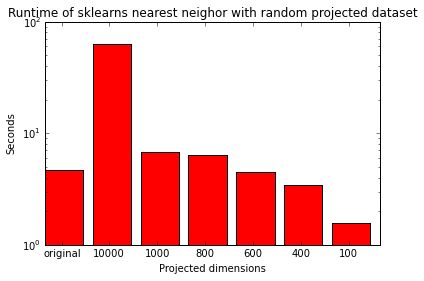

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(7)
print len(time_list)
plt.bar(ind, time_list, color='r')
plt.yscale('log')

plt.ylabel("Seconds")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("original", "10000","1000","800","600","400","100"))
plt.title("Runtime of sklearns nearest neighor with random projected dataset")
plt.show()
    

7


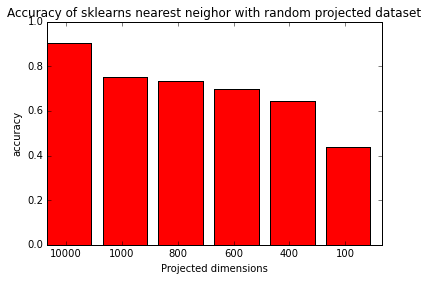

In [26]:
ind = np.arange(6)
print len(time_list)
plt.bar(ind, accuracy_list, color='r')

plt.ylabel("accuracy")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("10000","1000","800","600","400","100"))
plt.title("Accuracy of sklearns nearest neighor with random projected dataset")
plt.show()

In [27]:
print time_list

[4.720416069030762, 63.306145906448364, 6.829099893569946, 6.4139769077301025, 4.526046991348267, 3.450144052505493, 1.5602428913116455]


### random projection

In [29]:
data_projection = GaussianRandomProjection(n_components=10000, random_state=1)
dataset_dense_10000 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=1000, random_state=1)
dataset_dense_1000 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=800, random_state=1)
dataset_dense_800 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=600, random_state=1)
dataset_dense_600 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=400, random_state=1)
dataset_dense_400 = data_projection.fit_transform(datasetBursi)

data_projection = GaussianRandomProjection(n_components=100, random_state=1)
dataset_dense_100 = data_projection.fit_transform(datasetBursi)

MemoryError: 

In [ ]:
print "Projeted to 10000 dimensions:\n"
print "Shape: ", dataset_dense_10000.shape
print "Approximate number of non-zero features: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0])
print "Sparsity: ", dataset_dense_10000.nnz / float(dataset_dense_10000.shape[0]) / dataset_dense_10000.shape[1]
print "\n"

print "Projeted to 1000 dimensions:\n"
print "Shape: ", dataset_dense_1000.shape
print "Approximate number of non-zero features: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0])
print "Sparsity: ", dataset_dense_1000.nnz / float(dataset_dense_1000.shape[0]) / dataset_dense_1000.shape[1]
print "\n"

print "Projeted to 800 dimensions:\n"
print "Shape: ", dataset_dense_800.shape
print "Approximate number of non-zero features: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0])
print "Sparsity: ", dataset_dense_800.nnz / float(dataset_dense_800.shape[0]) / dataset_dense_800.shape[1]
print "\n"

print "Projeted to 600 dimensions:\n"
print "Shape: ", dataset_dense_600.shape
print "Approximate number of non-zero features: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0])
print "Sparsity: ", dataset_dense_600.nnz / float(dataset_dense_600.shape[0]) / dataset_dense_600.shape[1]
print "\n"

print "Projeted to 400 dimensions:\n"
print "Shape: ", dataset_dense_400.shape
print "Approximate number of non-zero features: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0])
print "Sparsity: ", dataset_dense_400.nnz / float(dataset_dense_400.shape[0]) / dataset_dense_400.shape[1]
print "\n"

print "Projeted to 100 dimensions:\n"
print "Shape: ", dataset_dense_100.shape
print "Approximate number of non-zero features: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0])
print "Sparsity: ", dataset_dense_100.nnz / float(dataset_dense_100.shape[0]) / dataset_dense_100.shape[1]

In [ ]:
exact = NearestNeighbors()
exact.fit(datasetBursi)
time_start = time.time()
exactNeighbors = exact.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)

In [ ]:
randomProjection = NearestNeighbors()

randomProjection.fit(dataset_dense_10000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 10000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)

accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_1000)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 1000 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_800)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 800 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_600)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 600 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_400)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 400 dimensions: ",neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
randomProjection = NearestNeighbors()
randomProjection.fit(dataset_dense_100)
time_start = time.time()
randomNeighbors = randomProjection.kneighbors(return_distance=False)
time_list.append(time.time() - time_start)
print "Accuracy with projection to 100 dimensions: ", neighborhood_accuracy(exactNeighbors, randomNeighbors)
accuracy_list.append(neighborhood_accuracy(exactNeighbors, randomNeighbors))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(7)
print len(time_list)
plt.bar(ind, time_list, color='r')
plt.yscale('log')

plt.ylabel("Seconds")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("original", "10000","1000","800","600","400","100"))
plt.title("Runtime of sklearns nearest neighor with random projected dataset")
plt.show()
    

In [ ]:
ind = np.arange(6)
print len(time_list)
plt.bar(ind, accuracy_list, color='r')

plt.ylabel("accuracy")
plt.xlabel("Projected dimensions")

plt.xticks(ind+0.35, ("10000","1000","800","600","400","100"))
plt.title("Accuracy of sklearns nearest neighor with random projected dataset")
plt.show()